# OBV

FF-23	OBV

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

On-Balance Volume (OBV) Definition  
https://www.investopedia.com/terms/o/onbalancevolume.asp

On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. Joseph Granville first developed the OBV metric in the 1963 book Granville's New Key to Stock Market Profits.  
Granville believed that volume was the key force behind markets and designed OBV to project when major moves in the markets would occur based on volume changes. In his book, he described the predictions generated by OBV as "a spring being wound tightly." He believed that when volume increases sharply without a significant change in the stock's price, the price will eventually jump upward or fall downward.  
On-balance volume provides a running total of an asset's trading volume and indicates whether this volume is flowing in or out of a given security or currency pair. The OBV is a cumulative total of volume (positive and negative). There are three rules implemented when calculating the OBV.


The Difference Between OBV And Accumulation/Distribution  

API  
https://mrjbq7.github.io/ta-lib/func_groups/volume_indicators.html
```
OBV - On Balance Volume
real = OBV(close, volume)
```




In [5]:
# !python -m pip install talib-binary
!python -m pip freeze

absl-py==0.11.0
alembic==1.3.3
asgiref==3.3.1
astunparse==1.6.3
async-generator==1.10
attrs==19.3.0
backcall==0.1.0
beautifulsoup4==4.8.2
bleach==3.1.0
blinker==1.4
bokeh==1.4.0
cachetools==4.2.0
certifi==2019.11.28
certipy==0.1.3
cffi==1.13.2
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
conda==4.7.12
conda-package-handling==1.6.0
cryptography==2.8
cvxpy==1.0.25
cycler==0.10.0
Cython==0.29.14
cytoolz==0.10.1
dask==2.9.2
decorator==4.4.1
defusedxml==0.6.0
dill==0.3.3
distributed==2.10.0
Django==3.1.4
django-crispy-forms==1.9.1
django-debug-toolbar==2.2
django-ide==0.0.5
django-wysiwyg==0.8.0
ecos==2.0.7.post1
entrypoints==0.3
fastcache==1.1.0
flatbuffers==1.12
fsspec==0.6.2
future==0.18.2
gast==0.3.3
gmpy2==2.1.0b1
google-auth==1.24.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
grpcio==1.34.0
h5py==2.10.0
HeapDict==1.0.1
html5lib==1.1
idna==2.8
imageio==2.6.1
importlib-metadata==1.5.0
inflect==4.0.0
ipykernel==5.1.4
ipython==7.11.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
jaraco.it

In [4]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

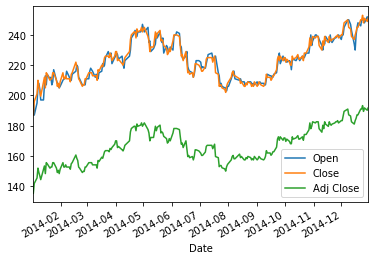

In [6]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

# OBV

On-balance volume provides a running total of an asset's trading volume and indicates whether this volume is flowing in or out of a given security or currency pair.

In [7]:
inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

obv = OBV(inputs)
slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("OBV")] = obv.tolist()
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()
daily.tail()



,High,Low,Open,Close,Volume,Adj Close,OBV,Stoch-K,Stoch-D
Date,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,19061100.0,93.217893,88.051948
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,17287300.0,89.523810,89.947090
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,19740000.0,90.476190,91.072631
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,17457500.0,85.255732,88.418577
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,19760100.0,83.827160,86.519694


# Plot of OBV on the original time-series

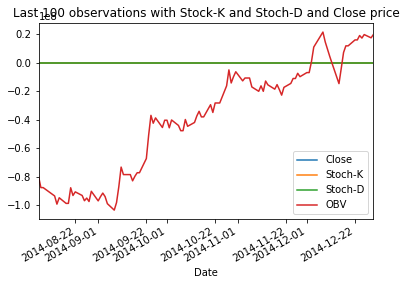

In [8]:
daily[['Close','Stoch-K','Stoch-D','OBV']][-100:].plot(title="Last 100 observations with Stock-K and Stoch-D and Close price")

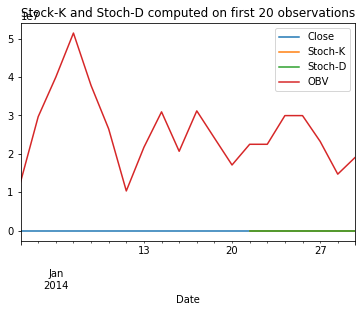

In [9]:
daily[['Close','Stoch-K','Stoch-D','OBV']][:20].plot(title="Stock-K and Stoch-D computed on first 20 observations")

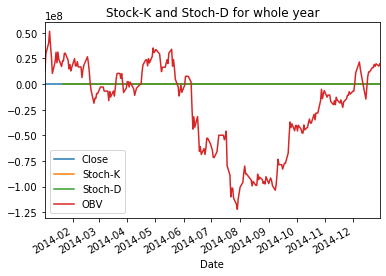

In [10]:
daily[['Close','Stoch-K','Stoch-D','OBV']].plot(title="Stock-K and Stoch-D for whole year")

# Need to standarize